In [1]:
!pip install --upgrade typing_extensions

In [2]:
!pip install --upgrade pydantic fastapi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.9/146.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.3/434.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.20.1
    Uninstalling pydantic_core-2.20.1:
      Successfully uninstalled pydantic_core-2.20.1
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.8.2
    Uninstalling pydantic-2.8.2:
      Successfully uninstalled pydantic-2.8.2


In [3]:
!pip install transformers gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.4 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.13.2
    Uninstalling tomlkit-0.13.2:
      Successful

In [4]:
from transformers import pipeline
import gradio as gr

# Initialize the chatbot with a pre-trained model
chatbot = pipeline('text-generation', model='gpt2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [5]:
def custom_response(user_input):
    # Custom logic for handling specific queries
    if "benefits" in user_input.lower():
        return "Our company offers a comprehensive benefits package including health insurance, retirement plans, and paid time off."
    elif "holiday" in user_input.lower():
        return "You can check the company's holiday schedule in the employee portal."
    else:
        # Generate a response using the GPT-2 model
        return chatbot(user_input, max_length=50)[0]['generated_text']

In [6]:
def chat(user_input):
    return custom_response(user_input)

# Create Gradio interface
interface = gr.Interface(fn=chat, inputs="text", outputs="text", title="AI-Powered Chatbot")

In [7]:
interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://b4849786081628a4ee.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
<ipython-input-8-4f53c99fedc8>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis', ax=ax)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://ce742287cd0aa24463.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


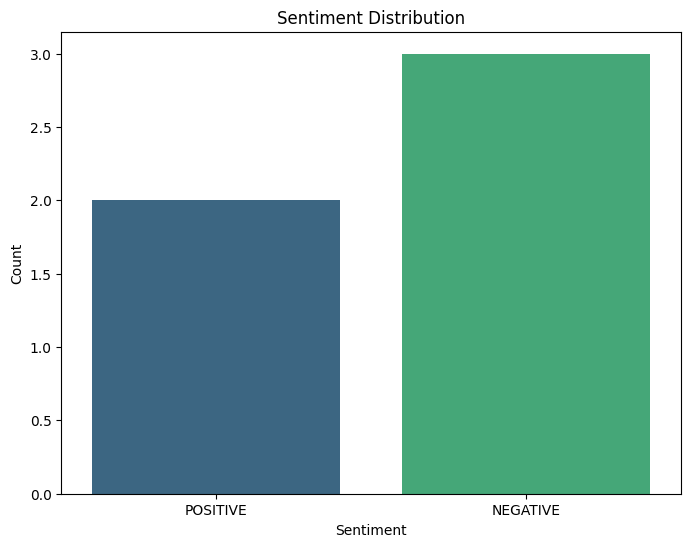

In [8]:
import pandas as pd
from transformers import pipeline
import gradio as gr
import matplotlib.pyplot as plt
import seaborn as sns
import io

# Initialize sentiment analysis pipeline
sentiment_analyzer = pipeline('sentiment-analysis')

# Define function for Gradio interface
def analyze_sentiment(text):
    result = sentiment_analyzer(text)
    sentiment = result[0]['label']
    score = result[0]['score']
    return f"Sentiment: {sentiment}", f"Score: {score:.2f}"

# Sample data
data = {
    "id": [1, 2, 3, 4, 5],
    "text": [
        "I love this product! It works perfectly.",
        "The service was terrible, I am very disappointed.",
        "Average experience, nothing special.",
        "This is the best thing I have ever bought.",
        "I would not recommend this to anyone."
    ]
}
df = pd.DataFrame(data)

# Perform sentiment analysis on sample data
df['sentiment'] = df['text'].apply(lambda x: sentiment_analyzer(x)[0]['label'])
df['score'] = df['text'].apply(lambda x: sentiment_analyzer(x)[0]['score'])

# Visualize sentiment distribution
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='sentiment', data=df, palette='viridis', ax=ax)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Define Gradio interface
interface = gr.Interface(
    fn=analyze_sentiment,
    inputs="text",
    outputs=["text", "text"],
    title="Sentiment Analysis",
    description="Analyze the sentiment of your text input."
)

interface.launch()


In [ ]:
!pip install transformers torch spacy

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
import gradio as gr
from transformers import BartTokenizer, BartForConditionalGeneration

In [ ]:
# Load the model and tokenizer
model_name = 'facebook/bart-large-cnn'
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)




In [ ]:
def chunk_text(text, max_length=1024):
    """
    Splits the text into chunks of the specified maximum length.
    """
    inputs = tokenizer(text, return_tensors='pt', truncation=False)
    input_ids = inputs.input_ids[0]

    chunks = []
    for i in range(0, len(input_ids), max_length):
        chunk = input_ids[i:i + max_length]
        chunks.append(chunk)

    return chunks

def summarize_text(text):
    chunks = chunk_text(text, max_length=1024)
    summaries = []

    for chunk in chunks:
        input_ids = chunk.unsqueeze(0)
        summary_ids = model.generate(input_ids, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        summaries.append(summary)

    return ' '.join(summaries)

def summarize_file(file):
    # Read the file content
    document_text = file.read().decode('utf-8')
    # Summarize the text
    summary = summarize_text(document_text)
    return summary

In [ ]:

# Create the Gradio interface
interface = gr.Interface(
    fn=summarize_file,
    inputs=gr.File(label="Upload Document"),
    outputs=gr.Textbox(label="Summary"),
    title="AI-Powered Document Summarization",
    description="Upload a document to generate a concise summary using AI.",
)

# Launch the interface
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0acb14866dcf689002.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
import gradio as gr
from transformers import BartTokenizer, BartForConditionalGeneration

# Load the model and tokenizer
model_name = 'facebook/bart-large-cnn'
tokenizer = BartTokenizer.from_pretrained(model_name)
model = BartForConditionalGeneration.from_pretrained(model_name)

def chunk_text(text, max_length=1024):
    """
    Splits the text into chunks of the specified maximum length.
    """
    inputs = tokenizer(text, return_tensors='pt', truncation=False)
    input_ids = inputs.input_ids[0]

    chunks = []
    for i in range(0, len(input_ids), max_length):
        chunk = input_ids[i:i + max_length]
        chunks.append(chunk)

    return chunks

def summarize_text(text):
    chunks = chunk_text(text, max_length=1024)
    summaries = []

    for chunk in chunks:
        input_ids = chunk.unsqueeze(0)
        summary_ids = model.generate(input_ids, max_length=150, min_length=40, length_penalty=2.0, num_beams=4, early_stopping=True)
        summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
        summaries.append(summary)

    return ' '.join(summaries)

def summarize_file(file):
    try:
        # Read the file content
        file_content = file.read()

        # Check if the file content is in bytes and needs decoding
        if isinstance(file_content, bytes):
            document_text = file_content.decode('utf-8')
        else:
            document_text = file_content

        # Summarize the text
        summary = summarize_text(document_text)
        return summary
    except UnicodeDecodeError:
        return "There was an issue decoding the file. Please ensure it's a UTF-8 encoded text file."
    except Exception as e:
        return f"An error occurred: {str(e)}"

# Create the Gradio interface
interface = gr.Interface(
    fn=summarize_file,
    inputs=gr.File(label="Upload Document"),
    outputs=gr.Textbox(label="Summary"),
    title="AI-Powered Document Summarization",
    description="Upload a document to generate a concise summary using AI.",
)

# Launch the interface
interface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://c84c05549b46c2eed4.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
